In [1]:
## https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand

## Attribute Information

* Date: The date the data was recorded (format: YYYY-MM-DD)
* Rented Bike Count: The number of bikes rented (target variable)
* Hour: The hour of the day (0 to 23)
* Temperature(°C): Temperature in degrees Celsius
* Humidity(%): Relative humidity in percentage
* Wind speed (m/s): Wind speed in meters per second
* Visibility (10m): Visibility measured in units of 10 meters
* Dew point temperature(°C): Dew point temperature in Celsius
* Solar Radiation (MJ/m2): Solar radiation in megajoules per square meter
* Rainfall(mm): Amount of rainfall in millimeters
* Snowfall (cm): Amount of snowfall in centimeters
* Seasons: Season of the year (Winter, Spring, Summer, Autumn)
* Holiday: Indicates if the day is a holiday (Holiday / No Holiday)
* Functional Day: Indicates if the day is a working day (Yes / No)

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler

In [26]:
dataset_cols = ['bike_count', 'hour', 'temp', 'humidity', 'wind', 'visibility', 'dew_pt_temp', 'radiation', 'rain', 'snow', 'functional']

df = pd.read_csv('Dataset/SeoulBikeData.csv', encoding='cp949').drop(['Date', 'Holiday', 'Seasons'], axis=1)
df

,Rented Bike Count,Hour,Temperature(캜),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(캜),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Functioning Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Yes
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Yes
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Yes
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Yes


In [27]:
df.columns = dataset_cols
df.head()

,bike_count,hour,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Yes


In [28]:
df['functional'] = (df['functional'] == 'Yes').astype(int)

df.head()

,bike_count,hour,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1


In [29]:
df = df[df['hour'] == 12]
df

,bike_count,hour,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
12,449,12,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,12,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,12,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,12,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,12,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
8652,752,12,9.1,57,1.1,562,1.0,1.69,0.0,0.0,1
8676,672,12,9.3,61,1.5,390,2.1,0.85,0.0,0.0,1
8700,635,12,7.9,14,1.7,1688,-18.0,1.81,0.0,0.0,1
8724,661,12,5.6,27,0.3,1522,-11.9,0.34,0.0,0.0,1


In [32]:
df = df.drop(['hour'], axis=1)
df.head()

,bike_count,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


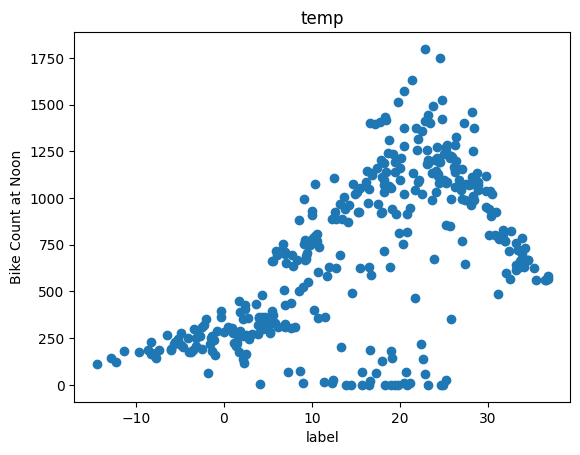

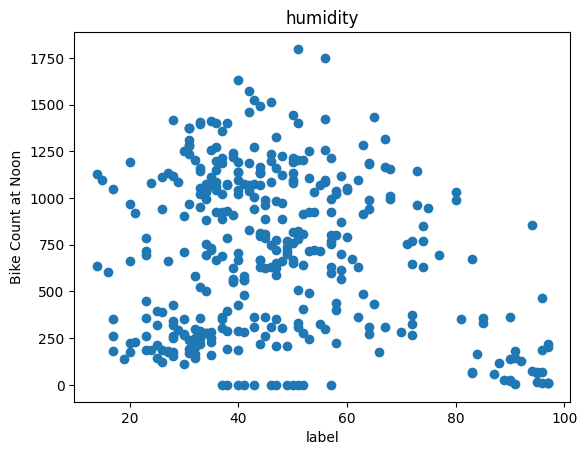

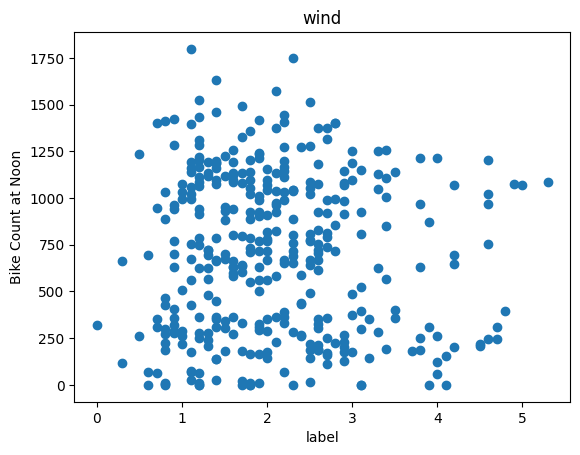

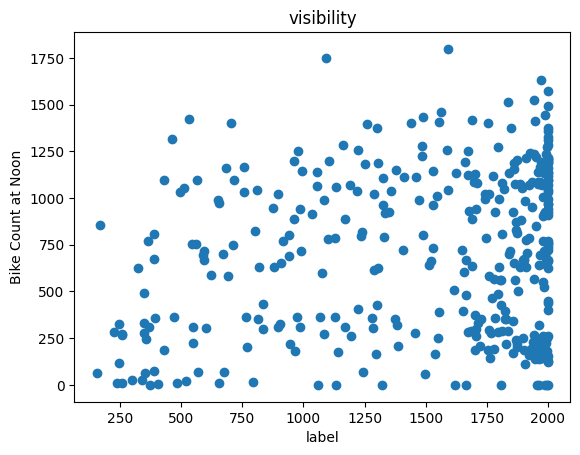

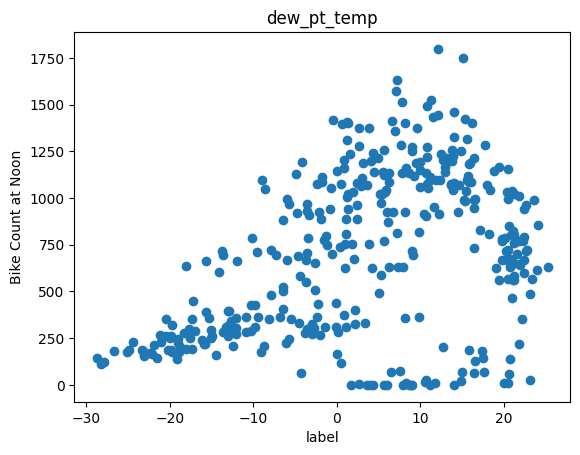

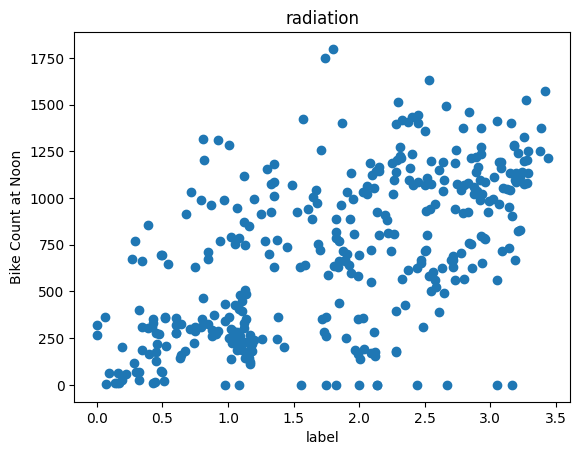

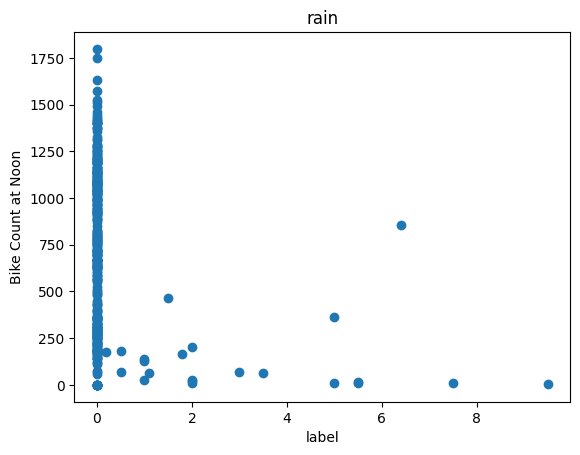

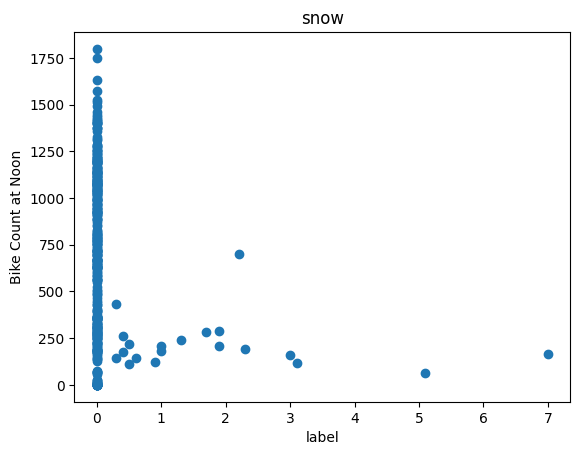

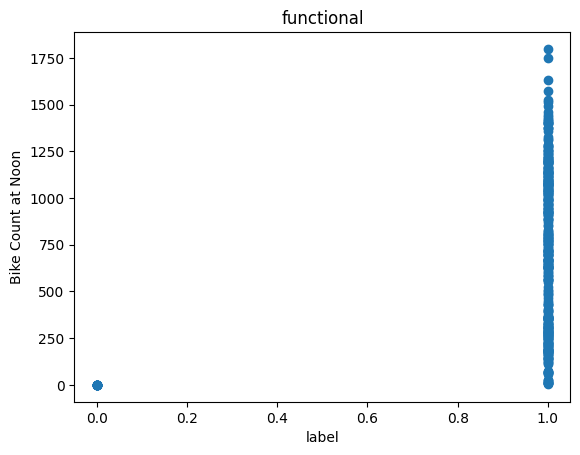

In [35]:
for label in df.columns[1:]:
    plt.scatter(df[label], df['bike_count'])
    plt.title(label)
    plt.ylabel('Bike Count at Noon')
    plt.xlabel('label')
    plt.show()

In [36]:
df = df.drop(['wind', 'visibility', 'functional'], axis=1)
df.head()

,bike_count,temp,humidity,dew_pt_temp,radiation,rain,snow
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


## Train/Valid/Test Dataset

In [37]:
train, val, test = np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])

C:\Users\yas\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
